# 2022 Running Analysis


In [6]:
%load_ext autoreload
%autoreload 2

import os
import sys

module_path = os.path.abspath(os.path.join('../stravadataanalysis'))
sys.path.insert(0, module_path)

activities_path = '../../../.tmp/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from analysis.src.repository import file_loader

activities = file_loader.load_activities(activities_path + "activities")

runs = activities[(activities['type'] == 'Run') & (activities['start_date'] >= '2022-01-01') & (
            activities['start_date'] < '2023-01-01')]


## 2022 Highlight

In [8]:
from analysis.src.view import data_format

runs_2022 = runs[['id', 'start_date', 'name', 'distance', 'elapsed_time', 'average_speed', 'total_elevation_gain']] \
    .sort_values('distance', ascending=False)
runs_2022['distance_overview'] = runs_2022['distance'].apply(data_format.m_as_km)
runs_2022['elapsed_time_overview'] = runs_2022['elapsed_time'].apply(data_format.seconds_as_hhmmss)
runs_2022['average_speed_overview'] = runs_2022['average_speed'].apply(data_format.mps_as_minpkm)
runs_2022['total_elevation_gain_overview'] = runs_2022['total_elevation_gain'].apply(data_format.m)
display(runs_2022[['id', 'name', 'distance_overview', 'elapsed_time_overview', 'average_speed_overview',
                   'total_elevation_gain_overview', 'start_date']])


,id,name,distance_overview,elapsed_time_overview,average_speed_overview,total_elevation_gain_overview,start_date
7,6819196468,Course à pied l'après-midi,21.34km,01:50:38,5:10min/km,121m,2022-03-13T15:21:44Z
11,7826768400,Foulées du Numérique 2022,19.25km,01:33:47,4:52min/km,13m,2022-09-18T07:48:00Z
391,6997761739,Henvic / Sentier Côtier à Carantec,18.89km,01:45:04,5:32min/km,263m,2022-04-17T15:00:17Z
152,8073190829,Course à pied dans l'après-midi,16.66km,01:25:26,5:08min/km,50m,2022-11-05T15:08:22Z
75,7257798072,Course à pied le matin,15.6km,01:24:23,5:23min/km,21m,2022-06-05T08:04:29Z
...,...,...,...,...,...,...,...
320,8204762747,Course à pied le matin,8.72km,00:42:59,4:56min/km,34m,2022-12-04T08:00:18Z
201,7754473027,Course à pied dans l'après-midi,8.62km,00:44:59,5:13min/km,0m,2022-09-04T15:39:12Z
297,7454700738,Course à pied le matin,7.75km,00:44:27,5:32min/km,46m,2022-07-12T04:51:23Z
193,8292080669,Course à pied le matin,5.66km,00:38:20,6:46min/km,58m,2022-12-26T09:09:11Z


In [9]:
from analysis.src.view import data_format
from analysis.src.domain import highlights
import pandas as pd

highlights_requests = [
    highlights.Highlight('max_distance', 'distance', display_function=data_format.m_as_km),
    highlights.Highlight('max_duration', 'elapsed_time',
                         display_function=lambda x: data_format.seconds_as_hhmmss(int(x))),
    highlights.Highlight('max_elevation_gain', 'total_elevation_gain', display_function=data_format.m),
    highlights.Highlight('earlier_run', 'start_time', ascending_sort_order=True),
    highlights.Highlight('max_average_speed', 'average_speed', data_format.mps_as_minpkm),
    highlights.Highlight('max_top_heartrate', 'max_heartrate', data_format.bpm),
]

columns = ["highlight", "value", "name", "start_date_local", "id"]

highlights_2022 = []
for highlight_request in highlights_requests:
    highlight = highlight_request.transform(runs)
    highlights_2022.append(highlight)

pd.DataFrame(highlights_2022, columns=columns)

,highlight,value,name,start_date_local,id
7,max_distance,21.34km,Course à pied l'après-midi,2022-03-13T16:21:44Z,6819196468
7,max_duration,01:50:38,Course à pied l'après-midi,2022-03-13T16:21:44Z,6819196468
391,max_elevation_gain,263m,Henvic / Sentier Côtier à Carantec,2022-04-17T17:00:17Z,6997761739
297,earlier_run,06:51:23,Course à pied le matin,2022-07-12T06:51:23Z,7454700738
141,max_average_speed,4:41min/km,Course à pied dans l'après-midi,2022-11-27T16:30:12Z,8177401446
144,max_top_heartrate,204bpm,Côtes à Chantenay,2022-11-10T12:10:37Z,8096506459


# Distance run

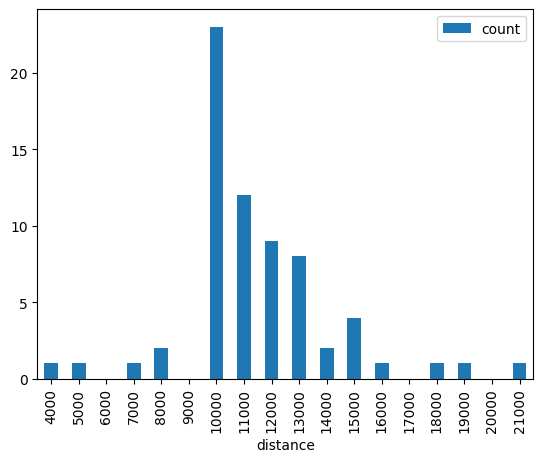

In [10]:
from analysis.src.domain.distances import get_distance_distribution
from analysis.src.view.plot import plot_distance_distribution

distance_distribution = get_distance_distribution(runs, 1000)

plot_distance_distribution(distance_distribution, True)

## Segments
Top 10 segments of the year :

,id,count,name
98,20310261,30,passage à côté du stade jusqu'au terrain de te...
45,13276220,17,Retour depuis pont
95,20263817,15,vers aire de jeu du parc de la Chézine
6,5403095,15,1km Chezine
93,20263702,14,Chézine partie sud du circuit principal
16,6899362,13,Montée de l'Avenue des Acacias
109,22650322,13,Bassin de la Chezine --> 2ème pont
88,19642112,13,chez moi
140,27607808,12,Pont Jules César --> Bd du Massacre
8,5472005,12,Dervallieres-Desgrées du lou


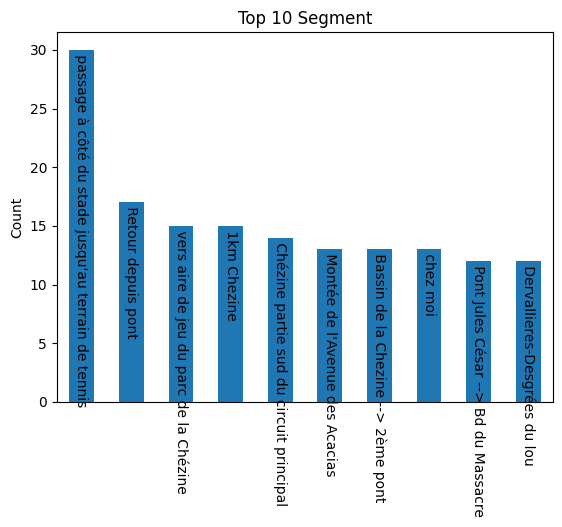

In [11]:
from analysis.src.domain import segments
from analysis.src.view import plot

top_10_segments = segments.get_top_10_segments(runs)

display(top_10_segments)

plot.plot_top_segments_bar(top_10_segments)


## Split metrics

Evolution of some metrics during my runs :
* speed
* heart rate

> NOTE: Training runs (Strava's workout_type 3) are excluded from the analysis because split runs create split metrics with various interval and the goal is to compare each km.

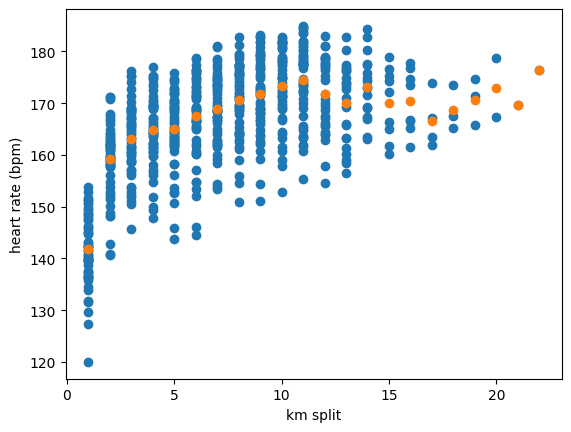

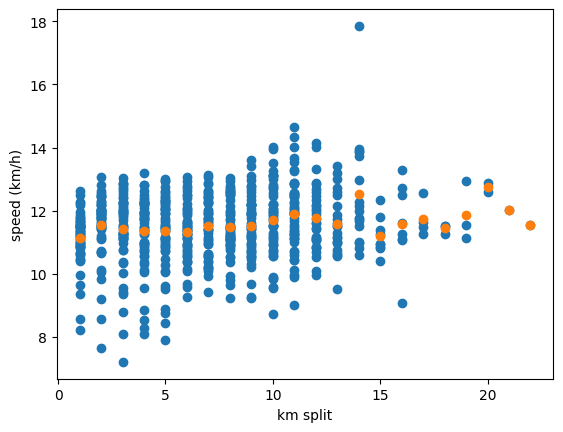

In [12]:
from analysis.src.domain import split_metrics
from analysis.src.view import plot

runs_activities = runs[runs['workout_type'] != 3].reset_index()
metrics = split_metrics.extract_split_metrics(runs_activities)

plot.plot_split_metric_heartrate(metrics['value'], metrics['means'])
plot.plot_split_metric_speed(metrics['value'], metrics['means'])